# Features of Contours

In [53]:
import cv2
import numpy as np
import matplotlib as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/zawster/.local/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['box', 'plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


### Moments

In [54]:
import numpy as np
import cv2 as cv
img = cv.imread('images/P0147.png',0)
ret,thresh = cv.threshold(img,127,255,0)
im2,contours,hierarchy = cv.findContours(thresh, 1, 2)
cnt = contours[0]
M = cv.moments(cnt)
print( M )

{'m00': 95748.0, 'm10': 64523721.5, 'm01': 69713456.83333333, 'm20': 43986758871.166664, 'm11': 47245339834.0, 'm02': 51953384858.5, 'm30': 30322909076193.152, 'm21': 32384203086395.7, 'm12': 35396872258949.47, 'm03': 39568305323695.35, 'mu20': 504799600.89927673, 'mu11': 266064303.27067566, 'mu02': 1195498911.5034103, 'mu30': 265503332.265625, 'mu21': -848651645.579895, 'mu12': -1488649206.0310059, 'mu03': 536010483.8671875, 'nu20': 0.055062963389920526, 'nu11': 0.02902199004170987, 'nu02': 0.1304036545978506, 'nu30': 9.359350215917031e-05, 'nu21': -0.00029916114025831006, 'nu12': -0.0005247689039906978, 'nu03': 0.00018895091805842741}


##### From this moments, you can extract useful data like area, centroid etc. Centroid is given by the relations, Cx=M10/M00 and Cy=M01/M00. This can be done as follows: 

In [55]:
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])

In [56]:
### Contour Area
area = cv.contourArea(cnt)
print("Area of Contour is:",area)

Area of Contour is: 95748.0


### Circles

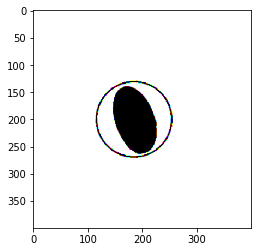

In [58]:
img11 = cv2.imread('images/P0147.png',0)
img = cv2.resize(img11, (400,400))
ret,thresh = cv2.threshold(img,127,255,0)
im2,contours,hierarchy = cv2.findContours(thresh, 1, 2)
cnt = contours[0]
M = cv2.moments(cnt)
(x,y),radius = cv2.minEnclosingCircle(cnt)
center = (int(x),int(y))
radius = int(radius)
radius += 5
# for i in range(4,0,-1):
img2 = cv2.circle(img,center,radius,(0,255,0),2)
# print(radius)
# img2 = cv2.imread('H0017.jpg',0)
# img1 = cv2.resize(img2, (400,400))
# fimg = cv2.bitwise_or(img1,img)
##--------
# cv2.imshow('detected circles',img2)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
img  = cv2.cvtColor(img2,cv2.COLOR_BAYER_BG2BGR)
imshow(img) # showing image
plt.show()

## Ellipse

(400, 400, 3)


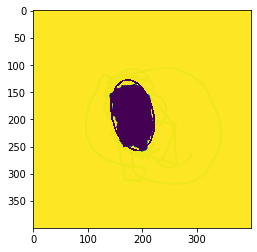

In [52]:
img1 = cv2.imread('images/mainImage.png',0)
img = cv2.resize(img1, (400,400))
ret,thresh = cv2.threshold(img,127,255,0)
im2,contours,hierarchy = cv2.findContours(thresh, 1, 2)
cnt = contours[0]
cnt = contours[0]
ellipse = cv2.fitEllipse(cnt)
fimg = cv2.ellipse(img,ellipse,(0,255,0),2)
imga  = cv2.cvtColor(fimg,cv2.COLOR_BAYER_BG2BGR)
print(imga.shape)
# cv2.imshow('detected ellips',fimg)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
imshow(img) # showing image
plt.show()

## Straight Rectangle

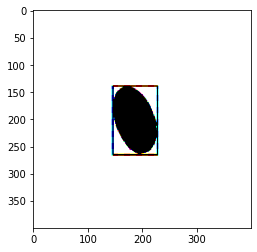

In [49]:
img11 = cv2.imread('images/P0147.png',0)
img = cv2.resize(img11, (400,400))
ret,thresh = cv2.threshold(img,127,255,0)
im2,contours,hierarchy = cv2.findContours(thresh, 1, 2)
cnt = contours[0]
cnt = contours[0]

x,y,w,h = cv2.boundingRect(cnt)
straigt_rect = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,127),2)
imga  = cv2.cvtColor(straigt_rect,cv2.COLOR_BAYER_BG2BGR)
# cv2.imshow('Detected Straight Rectangle',imga)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
# print(imga.shape)
imshow(imga) # showing image
plt.show()

## Rotated Rectangle

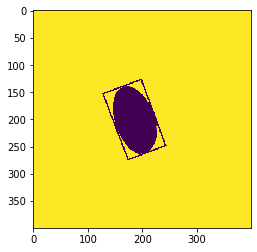

In [46]:
img11 = cv2.imread('images/P0147.png',0)
img = cv2.resize(img11, (400,400))
ret,thresh = cv2.threshold(img,127,255,0)
im2,contours,hierarchy = cv2.findContours(thresh, 1, 2)
cnt = contours[0]
rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)
rectangle_image = cv2.drawContours(img,[box],0,(0,0,255),2)
# cv2.imshow('Detected Rotated Rectangle',rectangle_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
imshow(rectangle_image) # showing image
plt.show()

## Contour Approximation 

In [22]:
img11 = cv2.imread('images/P0147.png',0)
img = cv2.resize(img11, (400,400))
ret,thresh = cv2.threshold(img,127,255,0)
im2,contours,hierarchy = cv2.findContours(thresh, 1, 2)
cnt = contours[0]
epsilon = 0.1*cv2.arcLength(cnt,True)
approx = cv2.approxPolyDP(cnt,epsilon,True)
print(hull[-6:])

[[[193 147]]

 [[206 160]]

 [[212 169]]

 [[219 183]]

 [[222 191]]

 [[227 206]]]


## Fitting a Line

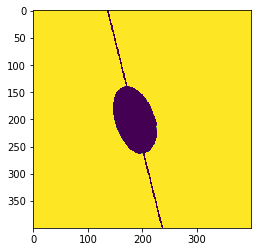

In [47]:
img11 = cv2.imread('images/P0147.png',0)
img = cv2.resize(img11, (400,400))
ret,thresh = cv2.threshold(img,127,255,0)
im2,contours,hierarchy = cv2.findContours(thresh, 1, 2)
cnt = contours[0]

rows,cols = img.shape[:2]
[vx,vy,x,y] = cv2.fitLine(cnt, cv2.DIST_L2,0,0.01,0.01)
lefty = int((-x*vy/vx) + y)
righty = int(((cols-x)*vy/vx)+y)
line_image = cv2.line(img,(cols-1,righty),(0,lefty),(0,255,0),2)
# cv2.imshow('Fitted Straight Line',line_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
imshow(line_image) # showing image
plt.show()